In [2]:
using LinearAlgebra
using Plots
using IterTools

In [3]:
include("TangentAngleBeat.jl")

dξ_dψ_1 (generic function with 1 method)

In [4]:
s = collect(0.0:L/20:L)
ψ_array = collect(0.0:2.0*π/50:2.0*π)

50-element Vector{Float64}:
 0.0
 0.12566370614359174
 0.25132741228718347
 0.3769911184307752
 0.5026548245743669
 0.6283185307179586
 0.7539822368615504
 0.8796459430051422
 1.0053096491487339
 1.1309733552923256
 ⋮
 5.152211951887261
 5.277875658030853
 5.403539364174445
 5.529203070318037
 5.6548667764616285
 5.7805304826052195
 5.906194188748811
 6.031857894892403
 6.157521601035995

┌ Info: Saved animation to C:\Users\pablo\AppData\Local\Temp\jl_4h6f63gfI1.gif
└ @ Plots C:\Users\pablo\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\pablo\\AppData\\Local\\Temp\\jl_4h6f63gfI1.gif")
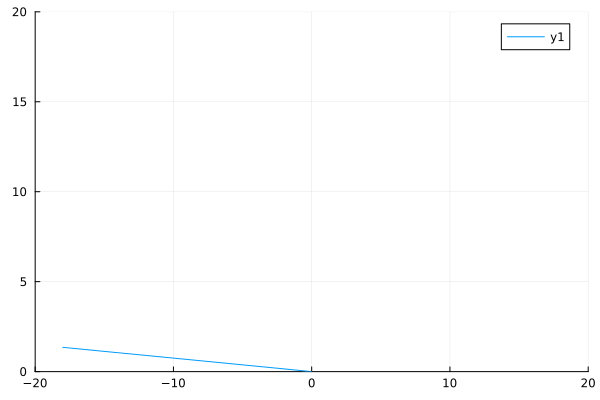

In [5]:
p = plot(xlim=(-20, 20), ylim=(0, 20))
@gif for ψ in ψ_array
    positions = zeros(20, 3)
    for i=1:20
        positions[i, :] += ξ(s[i], ψ)
    end
    plot(p, positions[:, 1], positions[:, 3])
end

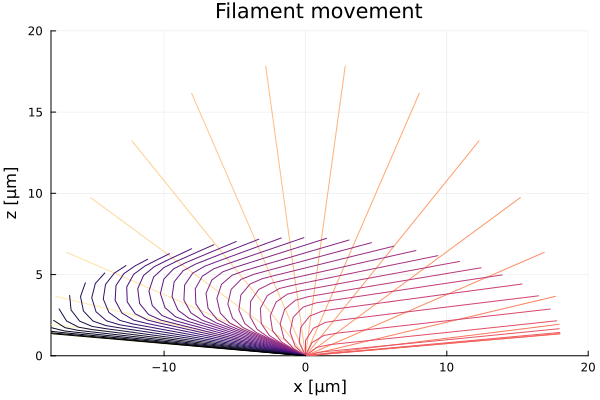

In [37]:
p = plot(
    xlim=(-L+1.0, L+1.0), ylim=(0.0, L+1.0), title="Filament movement",
    xaxis="x [μm]", yaxis="z [μm]", legend=false
)
color_scheme = palette(:magma, length(ψ_array), rev=true)
for (i, ψ) in enumerate(ψ_array)
    positions = zeros(20, 3)
    for i=1:20
        positions[i, :] .= ξ(s[i], ψ)
    end
    plot!(positions[:, 1], positions[:, 3], color=color_scheme[i])
end
display(p)